In [1]:
# Required packages and data paths
# Scanpy 1.8
import scanpy as sc
import anndata as ad
import episcanpy.api as epi
import pandas as pd

STUD_PATH = '/mnt/workspace_stud/'
OUTPUT_PATH = f'{STUD_PATH}stud2/output/'

In [2]:
# define input path and output directories
TISSUE = "liver_sample_9"
INPUT_PATH = f'{OUTPUT_PATH}wp1/{TISSUE}_pp17.h5ad'
output_wp4 = f"{OUTPUT_PATH}wp4/{TISSUE}_obs.csv"
output_wp3 = f"{OUTPUT_PATH}wp3/clusters_{TISSUE}.tsv"

In [3]:
# read input file and check matrix size
adata = ad.read(INPUT_PATH)
adata

AnnData object with n_obs × n_vars = 15588 × 958895
    obs: 'nb_features', 'log_nb_features'
    var: 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'
    layers: 'binary', 'normalised'

In [4]:
# calculate log
epi.pp.log1p(adata)

In [5]:
# prepare neighbours for clustering
# epi.pp.lazy(adata, min_dist=1.0, spread=2.0)
sc.pp.pca(adata, n_comps=50, svd_solver='arpack', use_highly_variable=False)
sc.pp.neighbors(adata, n_neighbors=25, n_pcs=50, method='umap', metric='euclidean')

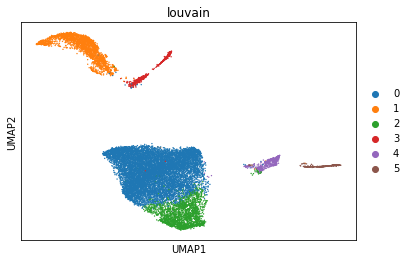

In [6]:
# calculate umap and cluster find clusters with louvain
# Umap: spread = 2.0, min_dist = 0.1
# Louvain: resolution = 0.5 - 0.8
sc.tl.umap(adata, min_dist=0.1, spread=2.0)
epi.tl.louvain(adata, resolution=0.5, use_weights=True)
epi.pl.umap(adata, color=['louvain'])

In [7]:
# write files for wp4/3
with open(output_wp4, "w") as obs_file, open(output_wp3, "w") as tsv_file:
    for barcode in range(len(adata.obs.index)):
        line = f"{adata.obs.index[barcode]}\t{adata.obs['louvain'][barcode]}\n"
        obs_file.write(line)
        tsv_file.write(line)

In [8]:
# write h5ad file for further analysis in scanpy 1.8
adata.write_h5ad(f'{OUTPUT_PATH}wp1/{TISSUE}_pp18.h5ad')

... storing 'transcript_annotation' as categorical


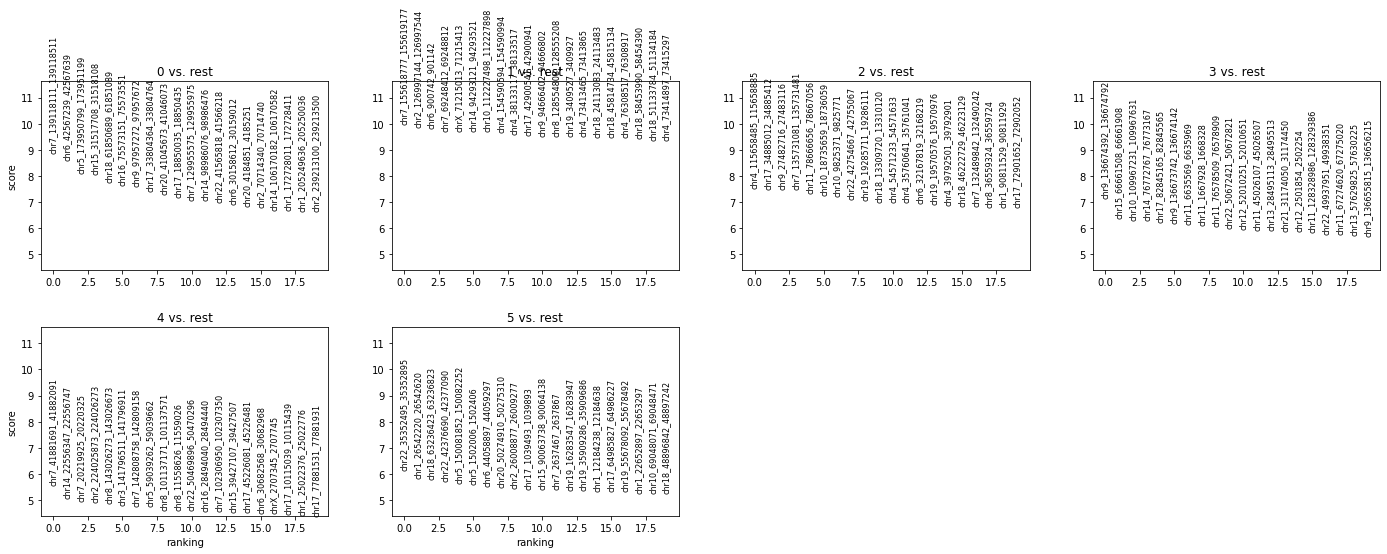

In [15]:
epi.tl.rank_features(adata, groupby='louvain', omic='ATAC', use_raw=False)
epi.pl.rank_feat_groups(adata)

In [ ]:
epi.tl.find_genes(adata,
           gtf_file=GTF_PATH,
           key_added='transcript_annotation',
           upstream=2000,
           feature_type='transcript',
           annotation='havana',
           raw=False)

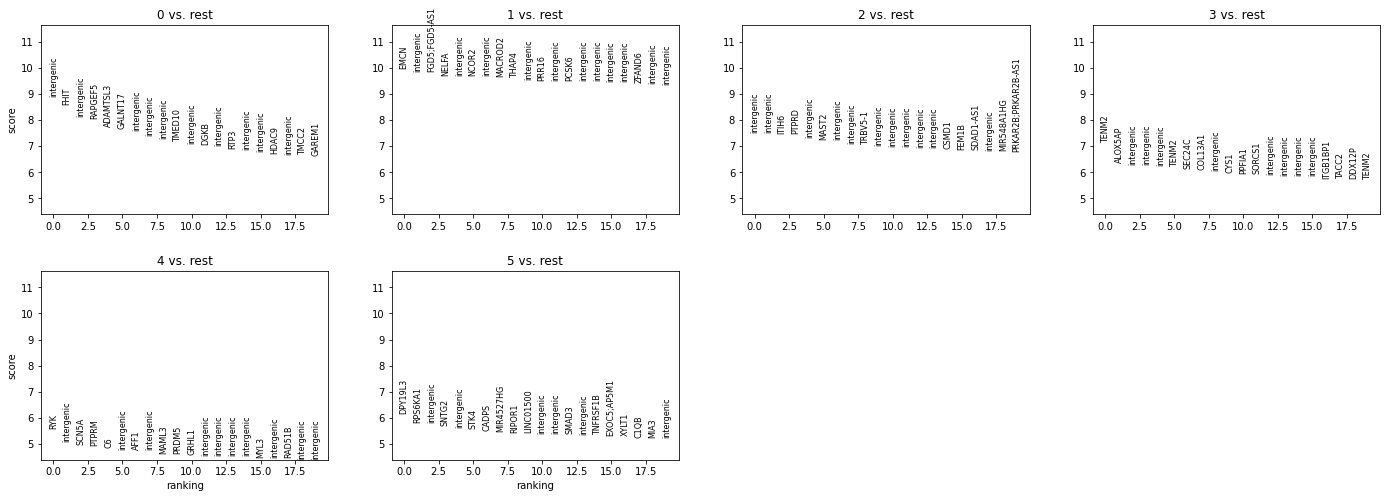

In [17]:
epi.pl.rank_feat_groups(adata, feature_symbols='transcript_annotation')

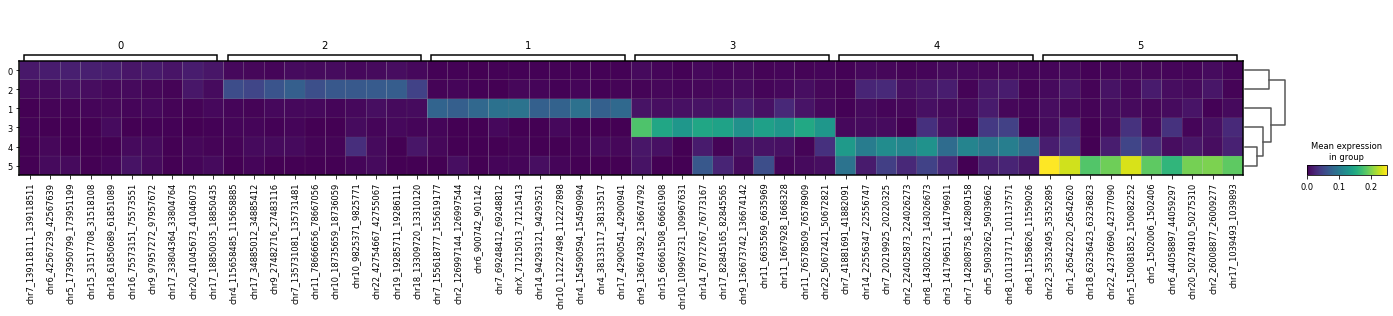

In [18]:
epi.pl.rank_feat_groups_matrixplot(adata)

In [31]:
for cluster in adata.obs['louvain'].unique():
    cluster_adata = adata[adata.obs['louvain'] == cluster]
    epi.pp.filter_features(cluster_adata, min_cells=1)
    cluster_path = f'{OUTPUT_PATH}wp1/{TISSUE}_cluster_{cluster}.bed'
    with open(cluster_path, 'w') as cl_output:
        for peak in cluster_adata.var.index:
            tmp = peak.replace('_', '\t')
            cl_output.write(f"{tmp}\n")

Trying to set attribute `.var` of view, copying.
Trying to set attribute `.var` of view, copying.
Trying to set attribute `.var` of view, copying.
Trying to set attribute `.var` of view, copying.
Trying to set attribute `.var` of view, copying.
Trying to set attribute `.var` of view, copying.


In [34]:
adata.uns['']

View of AnnData object with n_obs × n_vars = 9859 × 958895
    obs: 'nb_features', 'log_nb_features', 'louvain'
    var: 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score', 'transcript_annotation'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'louvain', 'louvain_colors', 'rank_features_groups', 'dendrogram_louvain'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'binary', 'normalised'
    obsp: 'distances', 'connectivities'